## Data Cleaning and Preparation - HR Classification

In this notebook we will be going to load the dataset called as HR Analytics Classification (https://www.kaggle.com/bhrt97/hr-analytics-classification) from Kaggle and analyse it perform the necessary data cleaning and pre-processing that may be required to better modelling.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_test = pd.read_csv('../data/HRAnalyticsClassification_test.csv')
df_train = pd.read_csv('../data/HRAnalyticsClassification_train.csv')

In [3]:
df_train

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


### Basic Pre-Processing

In [5]:
df_train['employee_id'].nunique() #As we can it is just an employee id which is unique for all so no use of it as a feature.

54808

In [6]:
df_train.drop('employee_id', axis=1, inplace=True)
df_test.drop('employee_id', axis=1, inplace=True)

In [7]:
df_train.drop_duplicates(inplace=True) #Since not many are duplicate we can just drop them
df_test.drop_duplicates(inplace=True)

In [8]:
df_train.dropna(inplace=True) #Since not many are na we can just drop those rows
df_test.dropna(inplace=True)

In [9]:
df_train.rename({'KPIs_met >80%':'KPI'}, axis=1, inplace=True)
df_test.rename({'KPIs_met >80%':'KPI'}, axis=1, inplace=True)

In [10]:
df_train.rename({'awards_won?':'awards_won'}, axis=1, inplace=True)
df_test.rename({'awards_won?':'awards_won'}, axis=1, inplace=True)

In [11]:
df_train.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,KPI,awards_won,avg_training_score,is_promoted
count,48607.000000,48607.000000,48607.000000,48607.000000,48607.000000,48607.000000,48607.000000,48607.000000
mean,1.252186,35.592199,3.337750,6.312465,0.356533,0.023165,63.609151,0.087045
std,0.605199,7.536432,1.257853,4.205675,0.478980,0.150430,13.274746,0.281904
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,1.000000,30.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,1.000000,34.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,1.000000,39.000000,4.000000,8.000000,1.000000,0.000000,76.000000,0.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [12]:
df_train

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPI,awards_won,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54802,Sales & Marketing,region_14,Bachelor's,m,other,2,31,1.0,2,0,0,49,0
54803,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0


### Understandingt the dataset better by plotting

<AxesSubplot:xlabel='is_promoted', ylabel='count'>

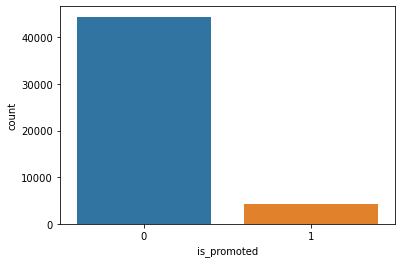

In [13]:
sns.countplot(x='is_promoted', data=df_train)

In [14]:
print("percentage of not promoted: ",df_train['is_promoted'].value_counts()[0]/len(df_train['is_promoted']))

percentage of not promoted:  0.9129549241878742


<AxesSubplot:xlabel='age', ylabel='length_of_service'>

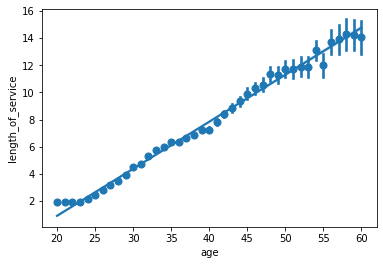

In [15]:
sns.regplot(x="age", y="length_of_service", data=df_train, x_estimator=np.mean)

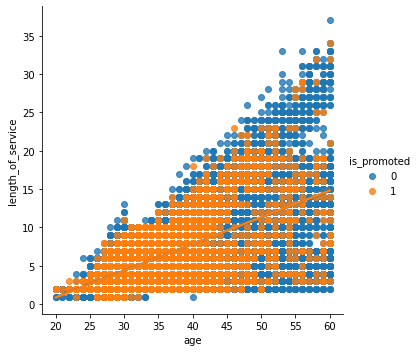

In [16]:
sns.lmplot(x="age", y="length_of_service", hue="is_promoted" ,data=df_train)

In [17]:
np.corrcoef(x=df_train['age'], y=df_train['length_of_service'])

array([[1.        , 0.62031576],
       [0.62031576, 1.        ]])

This basically implies that both age and length of service are quite same and we can mostly drop one of them as else we will count a similar property twice.

In [18]:
#Drop age as length of service seems more favourable for promotion compared to age
df_train.drop('age', axis=1, inplace=True)
df_test.drop('age', axis=1, inplace=True)

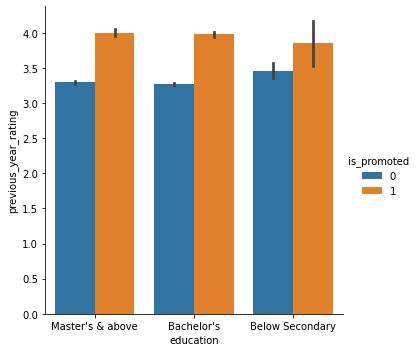

In [19]:
sns.catplot(x="education", y="previous_year_rating", hue="is_promoted", kind='bar', data=df_train)

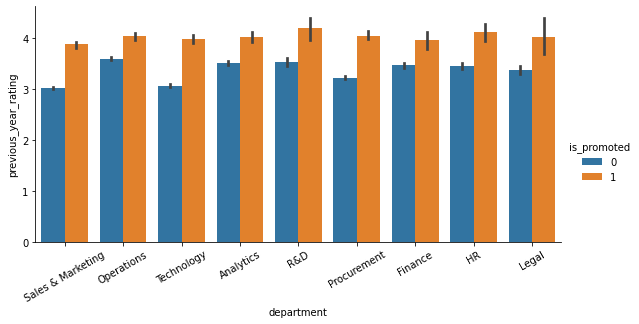

In [20]:
ax = sns.catplot(x="department", y="previous_year_rating", hue="is_promoted", kind='bar', data=df_train, height=4, aspect = 2)
ax.set_xticklabels(rotation=30)
plt.show()

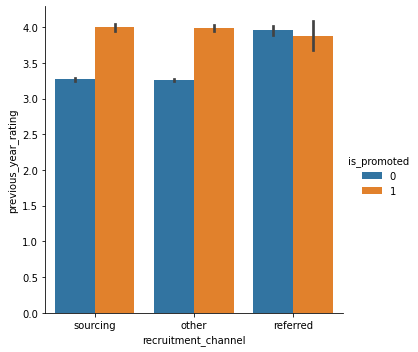

In [21]:
ax = sns.catplot(x="recruitment_channel", y="previous_year_rating", hue="is_promoted", kind='bar', data=df_train)

As we can see when comparing categorical data all the people promoted have a higher previous year rating (which felt obvious) but that was not the case with people who were 'referred'

In [22]:
df_train['no_of_trainings'].nunique()

10

In [23]:
df_train['KPI'].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='avg_training_score', ylabel='previous_year_rating'>

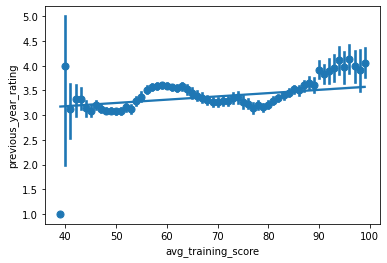

In [24]:
sns.regplot(x="avg_training_score", y="previous_year_rating", data=df_train, x_estimator=np.mean)

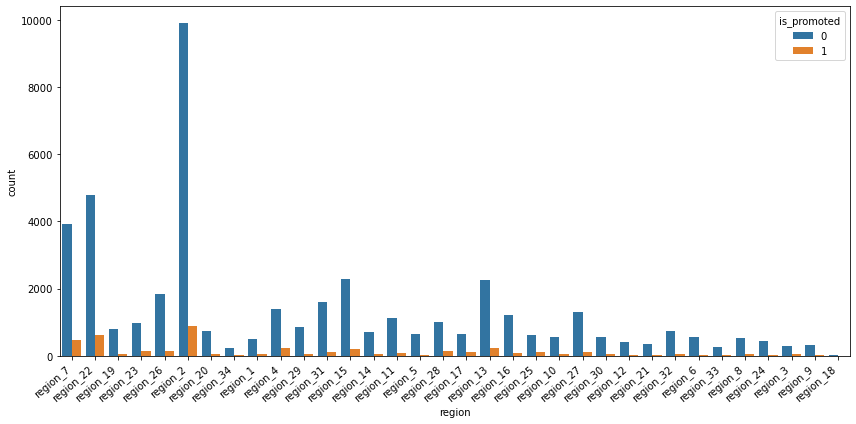

In [25]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x="region", hue="is_promoted", data=df_train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

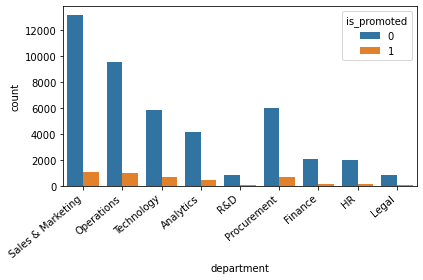

In [26]:
ax =sns.countplot(x="department", hue="is_promoted", data=df_train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

### Categorical features

In [27]:
categorical_features = ['department', 'gender' ,'region', 'education', 'recruitment_channel']
for feature in categorical_features:
    print(feature)
    print("Number of unique categories:", df_train[feature].nunique())
    print(df_train[feature].unique(), end='\n\n')

department
Number of unique categories: 9
['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']

gender
Number of unique categories: 2
['f' 'm']

region
Number of unique categories: 34
['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_32' 'region_6' 'region_33' 'region_8'
 'region_24' 'region_3' 'region_9' 'region_18']

education
Number of unique categories: 3
["Master's & above" "Bachelor's" 'Below Secondary']

recruitment_channel
Number of unique categories: 3
['sourcing' 'other' 'referred']



In [28]:
# Lets first deal Gender ==> As it has only two categorial we can apply dummy encoding / one hot encoding to it 
gender_encoded = pd.get_dummies(df_train['gender'])
df_train = pd.concat([df_train, gender_encoded], axis=1)
df_train.drop('gender', axis=1, inplace=True)

gender_encoded = pd.get_dummies(df_test['gender'])
df_test = pd.concat([df_test, gender_encoded], axis=1)
df_test.drop('gender', axis=1, inplace=True)

In [29]:
df_train.rename({'f':'Female', 'm':'Male'}, axis=1, inplace=True)
df_test.rename({'f':'Female', 'm':'Male'}, axis=1, inplace=True)

In [30]:
df_train.isna().sum(axis = 0)

department              0
region                  0
education               0
recruitment_channel     0
no_of_trainings         0
previous_year_rating    0
length_of_service       0
KPI                     0
awards_won              0
avg_training_score      0
is_promoted             0
Female                  0
Male                    0
dtype: int64

In [31]:
#Understanding which region has more probability and divide based on it
region_probs = df_train.groupby(["region", "is_promoted"]).agg({
    'department': ['count']
}).reset_index()
region_probs.columns = ['region', 'is_promoted','employees']
region_probs = pd.pivot_table(region_probs,
                             index = 'region',
                             columns = 'is_promoted',
                             values = 'employees').reset_index()
region_probs.columns = ['region','not_promoted','promoted']
region_probs['promotion_probs'] = (region_probs['promoted']/(region_probs['not_promoted']+region_probs['promoted']))*100
region_probs = region_probs.sort_values('promotion_probs', ascending=False).reset_index(drop=True)
region_probs

,region,not_promoted,promoted,promotion_probs
0,region_4,1387,239,14.698647
1,region_17,642,100,13.477089
2,region_25,623,97,13.472222
3,region_23,971,132,11.967362
4,region_28,1007,136,11.898513
5,region_22,4798,629,11.590197
6,region_3,294,37,11.178248
7,region_7,3918,477,10.853242
8,region_1,498,55,9.945750
9,region_8,526,51,8.838821


In [32]:
# We can split the regions into different numbers based on the probability(>10% = 2, >5% = 1, rest = 1)
region_2 = []
region_1 = []
region_0 = []
for i in range(34):
    if(region_probs.iloc[i].promotion_probs > 10):
        region_2.append(region_probs.iloc[i].region)
    elif(region_probs.iloc[i].promotion_probs > 5):
        region_1.append(region_probs.iloc[i].region)
    else:
        region_0.append(region_probs.iloc[i].region)

In [33]:
print("2 point regions: ", region_2)
print("1 point regions: ", region_1)
print("0 point regions: ", region_0)

2 point regions:  ['region_4', 'region_17', 'region_25', 'region_23', 'region_28', 'region_22', 'region_3', 'region_7']
1 point regions:  ['region_1', 'region_8', 'region_13', 'region_30', 'region_15', 'region_2', 'region_27', 'region_10', 'region_14', 'region_16', 'region_26', 'region_12', 'region_19', 'region_31', 'region_20', 'region_11']
0 point regions:  ['region_32', 'region_21', 'region_6', 'region_5', 'region_18', 'region_29', 'region_24', 'region_33', 'region_34', 'region_9']


In [34]:
df_train.replace(to_replace=region_2, value=2, inplace=True)
df_train.replace(to_replace=region_1, value=1, inplace=True)
df_train.replace(to_replace=region_0, value=0, inplace=True)

df_test.replace(to_replace=region_2, value=2, inplace=True)
df_test.replace(to_replace=region_1, value=1, inplace=True)
df_test.replace(to_replace=region_0, value=0, inplace=True)

In [35]:
df_train

,department,region,education,recruitment_channel,no_of_trainings,previous_year_rating,length_of_service,KPI,awards_won,avg_training_score,is_promoted,Female,Male
0,Sales & Marketing,2,Master's & above,sourcing,1,5.0,8,1,0,49,0,1,0
1,Operations,2,Bachelor's,other,1,5.0,4,0,0,60,0,0,1
2,Sales & Marketing,1,Bachelor's,sourcing,1,3.0,7,0,0,50,0,0,1
3,Sales & Marketing,2,Bachelor's,other,2,1.0,10,0,0,50,0,0,1
4,Technology,1,Bachelor's,other,1,3.0,2,0,0,73,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54802,Sales & Marketing,1,Bachelor's,other,2,1.0,2,0,0,49,0,0,1
54803,Technology,1,Bachelor's,sourcing,1,3.0,17,0,0,78,0,0,1
54804,Operations,1,Master's & above,other,1,2.0,6,0,0,56,0,1,0
54805,Analytics,1,Bachelor's,other,1,5.0,3,1,0,79,0,0,1


### Encoding

converting categorical features in numeric form so computer can understand

In [36]:
import category_encoders as ce

In [37]:
# Remove the target variable out and store in a variable called as y
y = df_train['is_promoted']

In [38]:
CB_encoder_department = ce.cat_boost.CatBoostEncoder()
train_cb_depart = CB_encoder_department.fit_transform(df_train['department'], y)
df_train['department'] = train_cb_depart

df_test['department'] = CB_encoder_department.transform(df_test['department'])

In [39]:
df_train

,department,region,education,recruitment_channel,no_of_trainings,previous_year_rating,length_of_service,KPI,awards_won,avg_training_score,is_promoted,Female,Male
0,0.087045,2,Master's & above,sourcing,1,5.0,8,1,0,49,0,1,0
1,0.087045,2,Bachelor's,other,1,5.0,4,0,0,60,0,0,1
2,0.043523,1,Bachelor's,sourcing,1,3.0,7,0,0,50,0,0,1
3,0.029015,2,Bachelor's,other,2,1.0,10,0,0,50,0,0,1
4,0.087045,1,Bachelor's,other,1,3.0,2,0,0,73,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54802,0.074565,1,Bachelor's,other,2,1.0,2,0,0,49,0,0,1
54803,0.106766,1,Bachelor's,sourcing,1,3.0,17,0,0,78,0,0,1
54804,0.092886,1,Master's & above,other,1,2.0,6,0,0,56,0,1,0
54805,0.096653,1,Bachelor's,other,1,5.0,3,1,0,79,0,0,1


In [40]:
CB_encoder_education = ce.cat_boost.CatBoostEncoder()
train_cb_education = CB_encoder_education.fit_transform(df_train['education'], y)
df_train['education'] = train_cb_education

df_test['education'] = CB_encoder_education.transform(df_test['education'])

In [41]:
CB_encoder_recruitment = ce.cat_boost.CatBoostEncoder()
train_cb_recruitment =  CB_encoder_recruitment.fit_transform(df_train['recruitment_channel'], y)
df_train['recruitment_channel'] = train_cb_recruitment

df_test['recruitment_channel'] = CB_encoder_recruitment.transform(df_test['recruitment_channel'])

In [42]:
CB_encoder_region = ce.cat_boost.CatBoostEncoder()
train_cb_region =  CB_encoder_region.fit_transform(df_train['region'], y)
df_train['region'] = train_cb_region

df_test['region'] = CB_encoder_region.transform(df_test['region'])

In [43]:
df_train

,department,region,education,recruitment_channel,no_of_trainings,previous_year_rating,length_of_service,KPI,awards_won,avg_training_score,is_promoted,Female,Male
0,0.087045,2,0.087045,0.087045,1,5.0,8,1,0,49,0,1,0
1,0.087045,2,0.087045,0.087045,1,5.0,4,0,0,60,0,0,1
2,0.043523,1,0.043523,0.043523,1,3.0,7,0,0,50,0,0,1
3,0.029015,2,0.029015,0.043523,2,1.0,10,0,0,50,0,0,1
4,0.087045,1,0.021761,0.029015,1,3.0,2,0,0,73,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54802,0.074565,1,0.081917,0.085316,2,1.0,2,0,0,49,0,0,1
54803,0.106766,1,0.081914,0.087330,1,3.0,17,0,0,78,0,0,1
54804,0.092886,1,0.098897,0.085313,1,2.0,6,0,0,56,0,1,0
54805,0.096653,1,0.081912,0.085310,1,5.0,3,1,0,79,0,0,1


In [44]:
for i in ['department', 'education', 'region', 'recruitment_channel']:
    print(i)
    print("Max value is:", df_train[i].max())
    print("Min value is:", df_train[i].min())

department
Max value is: 0.28064046143746596
Min value is: 0.0015826377420386512
education
Max value is: 0.25435225379060633
Min value is: 0.0021761268953031454
region
Max value is: 2
Min value is: 0
recruitment_channel
Max value is: 0.1678756260529462
Min value is: 0.0029015025270708607


In [45]:
award_encoded = pd.get_dummies(df_train['awards_won'], prefix="awards")
df_train = pd.concat([df_train, award_encoded], axis=1)
df_train.drop('awards_won', axis=1, inplace=True)

In [46]:
award_encoded_test = pd.get_dummies(df_test['awards_won'], prefix="awards")
df_test = pd.concat([df_test, award_encoded_test], axis=1)
df_test.drop('awards_won', axis=1, inplace=True)

In [47]:
KPI_encoded = pd.get_dummies(df_train['KPI'], prefix="KPI")
df_train = pd.concat([df_train, KPI_encoded], axis=1)
df_train.drop('KPI', axis=1, inplace=True)

KPI_encoded_test = pd.get_dummies(df_test['KPI'], prefix="KPI")
df_test = pd.concat([df_test, KPI_encoded_test], axis=1)
df_test.drop('KPI', axis=1, inplace=True)

In [48]:
df_train

,department,region,education,recruitment_channel,no_of_trainings,previous_year_rating,length_of_service,avg_training_score,is_promoted,Female,Male,awards_0,awards_1,KPI_0,KPI_1
0,0.087045,2,0.087045,0.087045,1,5.0,8,49,0,1,0,1,0,0,1
1,0.087045,2,0.087045,0.087045,1,5.0,4,60,0,0,1,1,0,1,0
2,0.043523,1,0.043523,0.043523,1,3.0,7,50,0,0,1,1,0,1,0
3,0.029015,2,0.029015,0.043523,2,1.0,10,50,0,0,1,1,0,1,0
4,0.087045,1,0.021761,0.029015,1,3.0,2,73,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54802,0.074565,1,0.081917,0.085316,2,1.0,2,49,0,0,1,1,0,1,0
54803,0.106766,1,0.081914,0.087330,1,3.0,17,78,0,0,1,1,0,1,0
54804,0.092886,1,0.098897,0.085313,1,2.0,6,56,0,1,0,1,0,1,0
54805,0.096653,1,0.081912,0.085310,1,5.0,3,79,0,0,1,1,0,0,1


In [49]:
df_train['no_of_trainings'].value_counts()

1     39350
2      7105
3      1578
4       402
5       116
6        34
7        10
10        5
8         4
9         3
Name: no_of_trainings, dtype: int64

In [50]:
df_train['qualification'] = (df_train['department']+df_train['education']+df_train['recruitment_channel'])/3
df_train.drop(['department', 'education', 'recruitment_channel'], axis=1, inplace=True)

In [51]:
df_test['qualification'] = (df_test['department']+df_test['education']+df_test['recruitment_channel'])/3
df_test.drop(['department', 'education', 'recruitment_channel'], axis=1, inplace=True)

In [52]:
df_test

,region,no_of_trainings,previous_year_rating,length_of_service,avg_training_score,Female,Male,awards_0,awards_1,KPI_0,KPI_1,qualification
1,2,1,3.0,5,51,1,0,1,0,1,0,0.074589
2,1,1,1.0,4,47,0,1,1,0,1,0,0.080590
3,1,3,2.0,9,65,1,0,1,0,1,0,0.088432
4,0,1,4.0,7,61,0,1,1,0,1,0,0.083751
5,2,1,3.0,2,68,0,1,1,0,1,0,0.089106
...,...,...,...,...,...,...,...,...,...,...,...,...
23484,1,1,4.0,2,51,0,1,1,0,1,0,0.080590
23485,1,1,3.0,1,61,0,1,1,0,1,0,0.071515
23486,2,1,3.0,7,74,0,1,1,0,1,0,0.091994
23487,1,1,4.0,4,50,1,0,1,0,1,0,0.075263


In [53]:
df_train

,region,no_of_trainings,previous_year_rating,length_of_service,avg_training_score,is_promoted,Female,Male,awards_0,awards_1,KPI_0,KPI_1,qualification
0,2,1,5.0,8,49,0,1,0,1,0,0,1,0.087045
1,2,1,5.0,4,60,0,0,1,1,0,1,0,0.087045
2,1,1,3.0,7,50,0,0,1,1,0,1,0,0.043523
3,2,2,1.0,10,50,0,0,1,1,0,1,0,0.033851
4,1,1,3.0,2,73,0,0,1,1,0,1,0,0.045940
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54802,1,2,1.0,2,49,0,0,1,1,0,1,0,0.080599
54803,1,1,3.0,17,78,0,0,1,1,0,1,0,0.092004
54804,1,1,2.0,6,56,0,1,0,1,0,1,0,0.092365
54805,1,1,5.0,3,79,0,0,1,1,0,0,1,0.087958


## Saving the final dataset after cleaning into a csv file

In [54]:
df_train.to_csv("../data/HR_Classification_final.csv", index=False)
df_test.to_csv("../data/HR_Classification_final_test.csv", index=False)